In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import nrrd
import mahotas as mh

In [3]:
DATAPATH = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'

In [4]:
DATASETS = [v for v in os.listdir(DATAPATH) if os.path.isdir(DATAPATH + v)]

In [5]:
# grab one dataset
D = DATASETS[0]

In [6]:
files = os.listdir(DATAPATH + D)
label_file = [os.path.join(DATAPATH, D, s) for s in files if 'seg' in s][0]
image_file = [os.path.join(DATAPATH, D, i) for i in files if not 'seg' in i][0]

In [7]:
label = nrrd.read(label_file)[0]
image = nrrd.read(image_file)[0]

In [8]:
print('Plaque segment count:', label.max())

Plaque segment count: 6


In [9]:
bbox = mh.bbox(label) # ignore large portion of label since its all 0
                      # to only include annotated plaque regions

In [10]:
# crop label and image according to bbox but make it a little larger
increase_xy = 10 
increase_z = 0 # no increase in z
label_cropped = label[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]
image_cropped = image[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]

print('Image/Label shape', image_cropped.shape)

Image/Label shape (209, 56, 18)


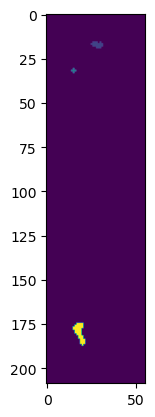

In [11]:
imshow(label_cropped[:,:,5])

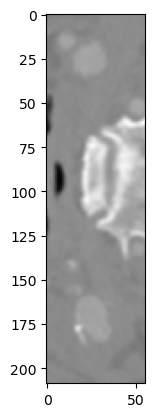

In [12]:
imshow(image_cropped[:,:,5], cmap='gray')

Plaque segment count: 7
Image/Label shape (130, 45, 22)


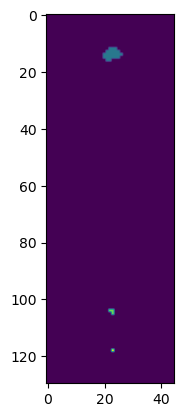

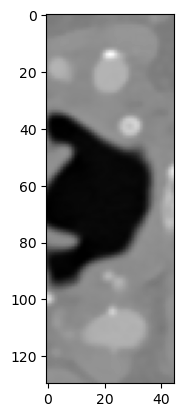

In [13]:
#
# and now one more dataset
# 
D = DATASETS[3]

files = os.listdir(DATAPATH + D)
label_file = [os.path.join(DATAPATH, D, s) for s in files if 'seg' in s][0]
image_file = [os.path.join(DATAPATH, D, i) for i in files if not 'seg' in i][0]

label = nrrd.read(label_file)[0]
image = nrrd.read(image_file)[0]
print('Plaque segment count:', label.max())

bbox = mh.bbox(label) # ignore large portion of label since its all 0
                      # to only include annotated plaque regions
    
# crop label and image according to bbox but make it a little larger
increase_xy = 10 
increase_z = 0 # no increase in z
label_cropped = label[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]
image_cropped = image[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]

print('Image/Label shape', image_cropped.shape)

imshow(label_cropped[:,:,5])
plt.figure()
imshow(image_cropped[:,:,5], cmap='gray')

In [21]:
all_images = []
all_labels = []

for z in range(image_cropped.shape[2]):
    
    # binarize the cropped label
    label_cropped_bin = label_cropped[:,:,z].copy().astype(np.bool_)
    label_cropped_bin[label_cropped[:,:,z] > 0] = 1
    
    all_images.append(image_cropped[:,:,z])
    all_labels.append(label_cropped_bin)
        
# now we have all slices for one dataset seperated
len(all_images)

22

In [ ]:
# NEXT STEPS:
# do this for all datasets and then make sure we pad them to the max size so we can train a unet
